![HACKTIV8](datasets/h8.png)

---
# Assignment 3

#### Gladis Hafifah
---

---
## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

---

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
bank_data = pd.read_csv('datasets/bank-additional-full.csv', sep=';')

In [3]:
pd.set_option('display.max.columns', None)
bank_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data = bank_data.rename(columns={'y':'target'})
bank_data.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
bank_data.shape

(41188, 21)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype=object)

In [8]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Missing Value

In [9]:
bank_data.isnull().values.any()

False

In [10]:
print(sum(bank_data.duplicated()))

12


Pada data tersebut tidak ada data yang missing value, hanya saja terdapat 12 data yang duplikat. maka dari itu perlu dihapuskan data duplikat tersebut agar hasil menjadi lebih akurat.

In [11]:
bank_data.drop_duplicates(inplace=True)
print(sum(bank_data.duplicated()))

0


## Data Visualization
mencari tahu berapakah jumlah client yang memilih untuk bergabung dalam deposito jangka bank!

In [12]:
client = pd.DataFrame({'Total':bank_data['target'].value_counts(),
                       'Presentase':(bank_data['target'].value_counts()/bank_data.shape[0])*100})
client

,Total,Presentase
no,36537,88.733728
yes,4639,11.266272


Berdasarkan data yang diatas terdapat 36537 client atau 88% memilih untuk tidak bergabung pada deposito jangka bank, dan terdapat 4639 client atau 11% memilih untuk bergabung dalam deposito jangka bank tersebut.

Lalu mari kita lihat client yang memutuskan untuk bergabung memiliki kerjaan sebagai apa?

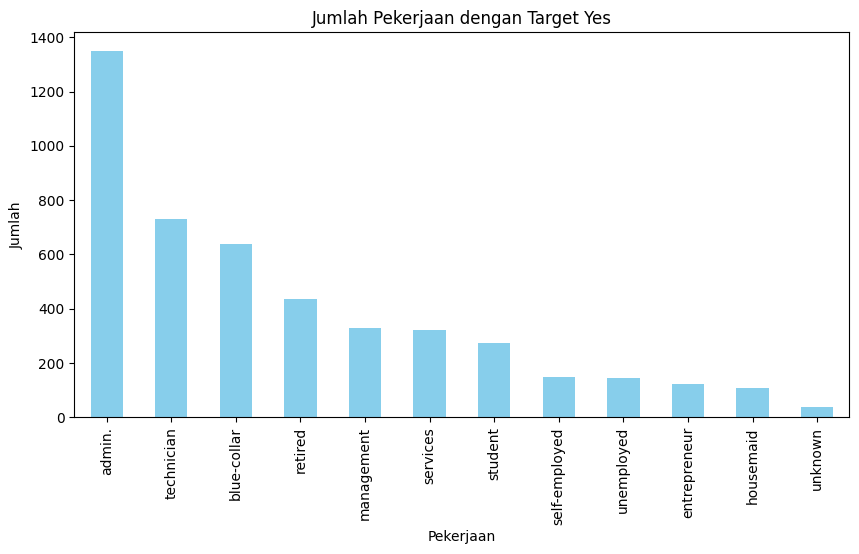

In [13]:
target_yes = bank_data[bank_data['target'] == 'yes']
job_yes = target_yes['job'].value_counts()

plt.figure(figsize=(10,5))
job_yes.plot(kind='bar', color='skyblue')
plt.title('Jumlah Pekerjaan dengan Target Yes')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.show()

Dari visualisai tersebut terdapat 12 jenis pekerjaan para client yang memilih untuk bergabung pada depositi berjangka, dan jumlah terbanyak client bank bekerja sebagai **admin**.

Dari 4639 client yang bergabung, memiliki status sebagai berikut:

In [14]:
target_yes = bank_data[bank_data['target'] == 'yes']
marital_yes = target_yes['marital'].value_counts()
marital_yes

married     2531
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

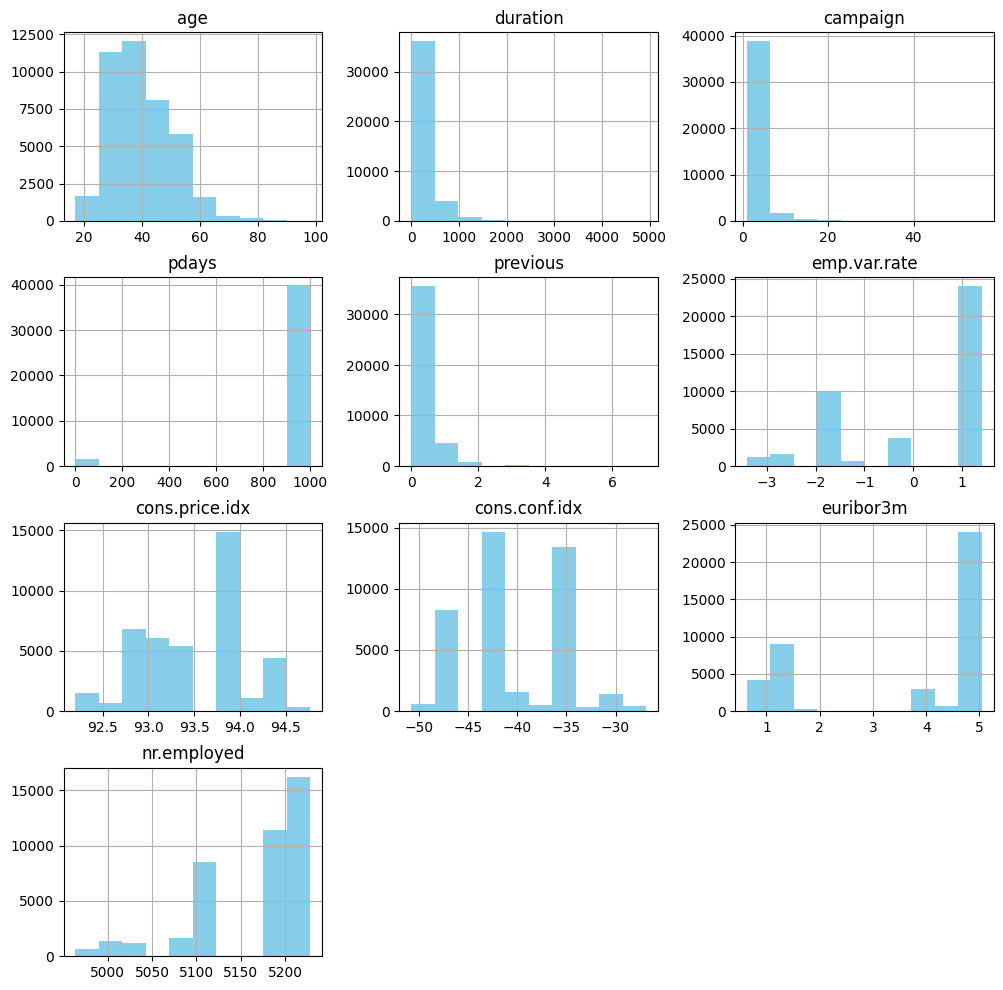

In [15]:
bank_data.hist(figsize=(12,12), color='skyblue')
plt.show()

## Encoding Data Columns

In [16]:
label_encoder= preprocessing.LabelEncoder()

category = bank_data.select_dtypes(include='object')
encode_data = bank_data.copy()

for column in category.columns:
    encode_data[column] = label_encoder.fit_transform(bank_data[column])

In [17]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [18]:
encode_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Standardization

In [19]:
scaler = preprocessing.StandardScaler()
scale_data = encode_data.copy()
numeric_data = bank_data.select_dtypes(include=['int64','float64'])

for column in numeric_data.columns:
  scale_data[column] = scaler.fit_transform(bank_data[column].values.reshape(-1,1))

In [20]:
scale_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,1.533143,3,1,0,0,0,0,1,6,1,0.010352,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
1,1.629107,7,1,3,1,0,0,1,6,1,-0.421577,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
2,-0.290177,7,1,3,0,2,0,1,6,1,-0.124626,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
3,-0.002284,0,1,1,0,0,0,1,6,1,-0.413864,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
4,1.533143,7,1,3,0,0,2,1,6,1,0.187751,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0


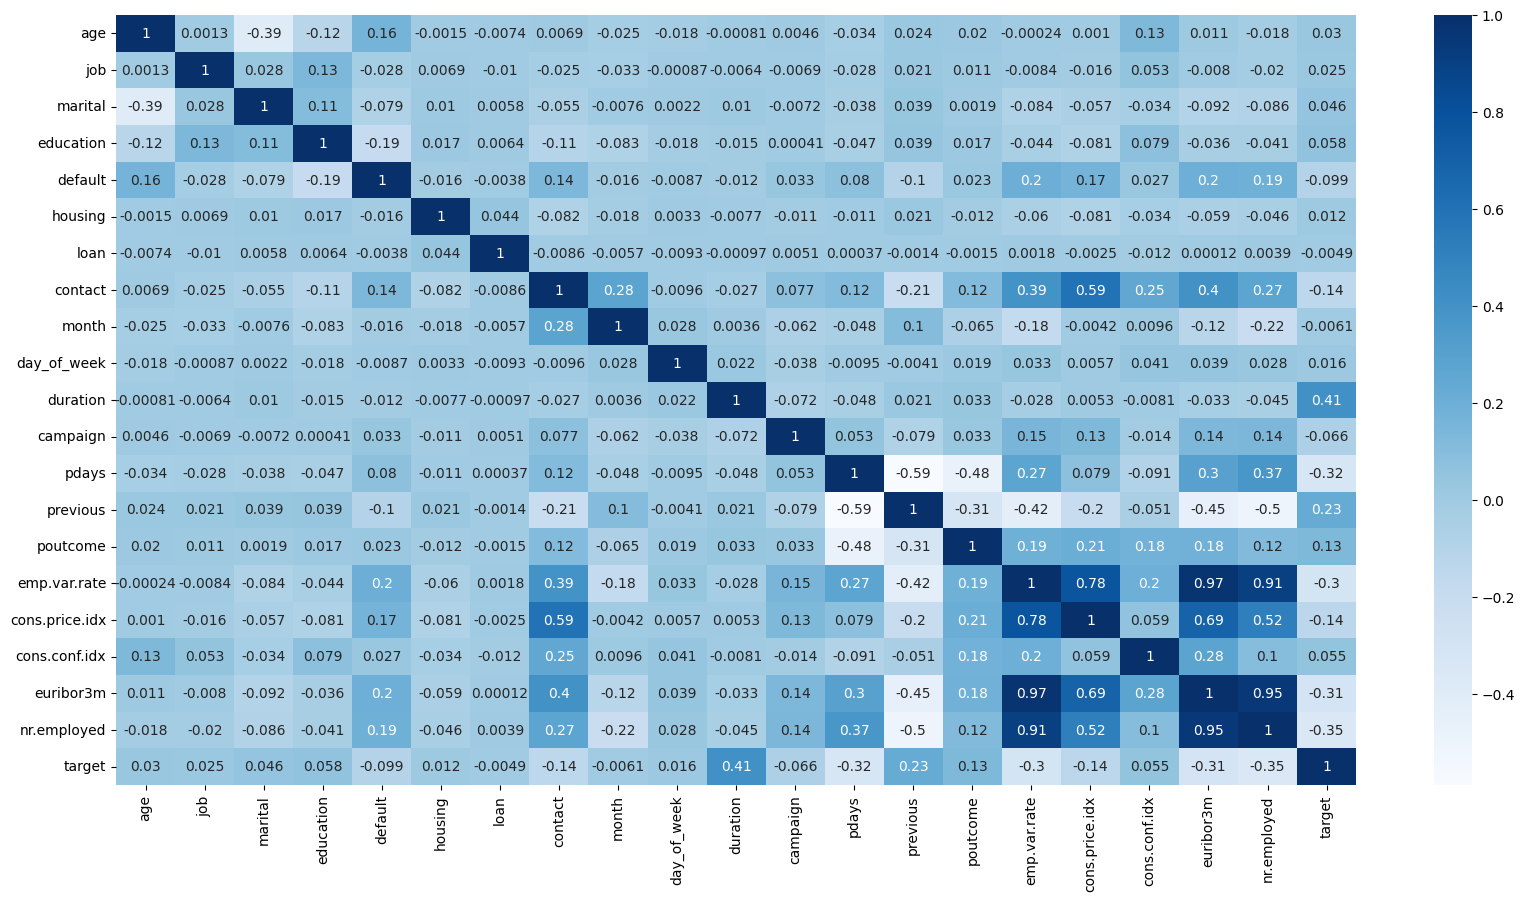

In [21]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(scale_data.corr(), annot=True, cmap='Blues')

In [22]:
scale_data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,0.001270,-0.389829,-0.117960,0.164939,-0.001477,-0.007359,0.006917,-0.025023,-0.017614,-0.000808,0.004622,-0.034381,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.001270,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,-0.006408,-0.006865,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.389829,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,0.010278,-0.007189,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.117960,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,-0.015086,0.000406,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
default,0.164939,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,-0.011805,0.032809,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
housing,-0.001477,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,-0.007688,-0.011074,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007359,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,-0.000970,0.005119,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.006917,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,-0.026665,0.077387,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,-0.025023,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,0.003637,-0.062128,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
day_of_week,-0.017614,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,0.021990,-0.038254,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


## Model Machine Learning

### Logistic Regression

In [23]:
X = scale_data.drop(columns=['target'])
y = scale_data.target

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model_logistic_regression = LogisticRegression()

In [25]:
model_logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred_lr = model_logistic_regression.predict(X_test)

In [27]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred_lr)
print('Akurasi dari Logistic Regression:', accuracy_logistic_regression)

Akurasi dari Logistic Regression: 0.9046867411364741


#### Logistic Regression Confusion Matrix

In [28]:
lr_confusion = confusion_matrix(y_test, y_pred_lr)

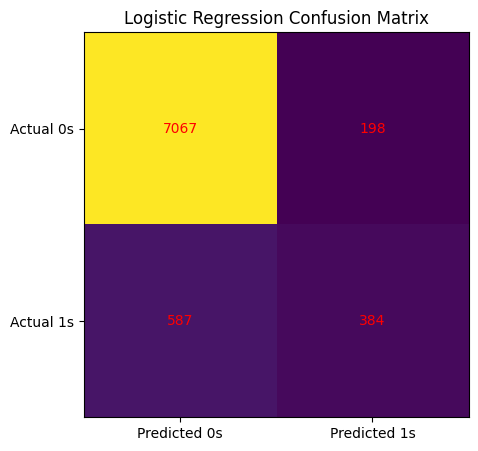

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Logistic Regression Confusion Matrix')
ax.imshow(lr_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, lr_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [30]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.40      0.49       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236



---
---

### K-Nearest Neighbors (KNN)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn.predict(X_test)

In [33]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Akurasi dari K-Nearest Neighbors:', accuracy_knn)

Akurasi dari K-Nearest Neighbors: 0.894487615347256


#### Confusion Matrix K-Nearest Neighbors

In [34]:
knn_confusion = confusion_matrix(y_test, y_pred_knn)

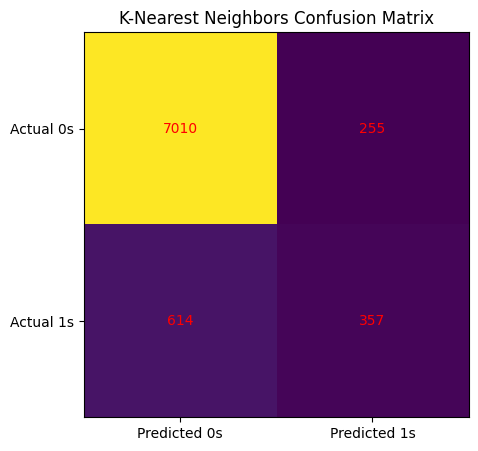

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('K-Nearest Neighbors Confusion Matrix')
ax.imshow(knn_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [36]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7265
           1       0.58      0.37      0.45       971

    accuracy                           0.89      8236
   macro avg       0.75      0.67      0.70      8236
weighted avg       0.88      0.89      0.88      8236



---
---

### Support Vector Machine

In [37]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [38]:
y_pred_svm = svm.predict(X_test)

In [39]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Akurasi dari Support Vector Machine:', accuracy_svm)

Akurasi dari Support Vector Machine: 0.9022583778533269


#### Support Vector Machine Confusion Matrix

In [40]:
svm_confusion = confusion_matrix(y_test, y_pred_svm)

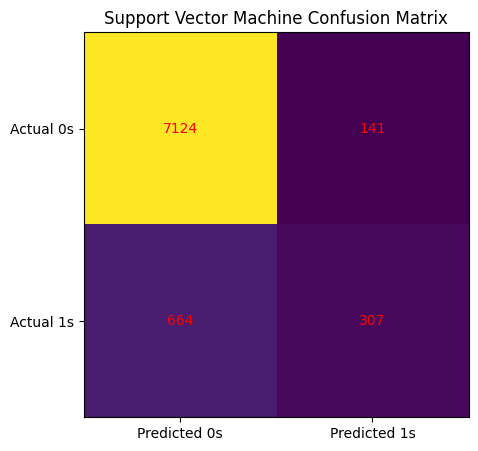

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Support Vector Machine Confusion Matrix')
ax.imshow(svm_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [42]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7265
           1       0.69      0.32      0.43       971

    accuracy                           0.90      8236
   macro avg       0.80      0.65      0.69      8236
weighted avg       0.89      0.90      0.89      8236



---
---

### Decision Tree

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = dt.predict(X_test)

In [45]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Akurasi Decision Tree:', accuracy_dt)

Akurasi Decision Tree: 0.88465274405051


#### Vizualitation Decision Tree

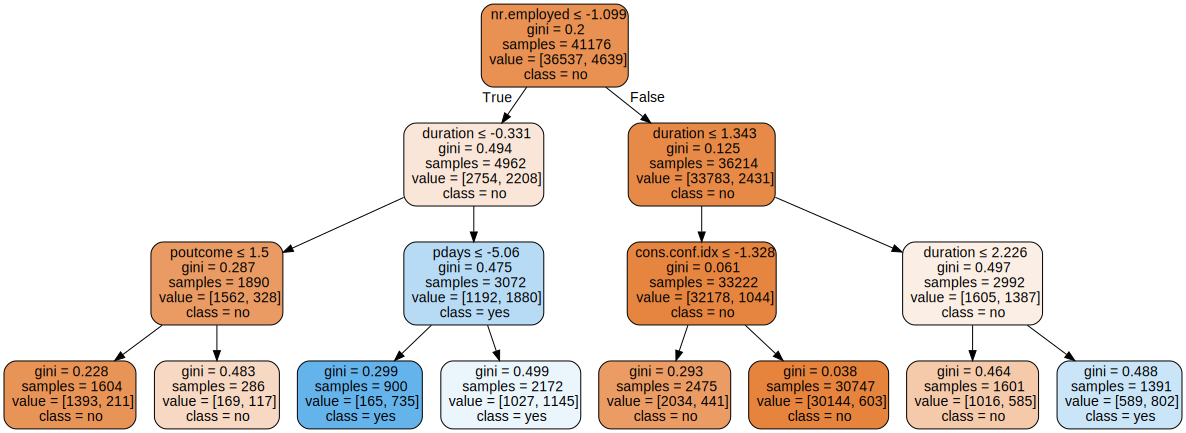

In [46]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns.values,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

#### Decision Tree Confusion Matrix

In [47]:
dt_confusion = confusion_matrix(y_test, y_pred_dt)

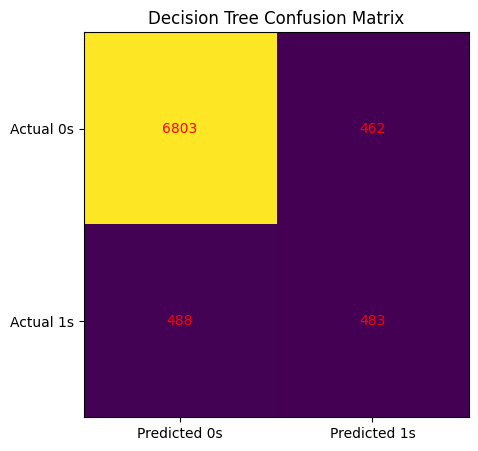

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Decision Tree Confusion Matrix')
ax.imshow(dt_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, dt_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [49]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7265
           1       0.51      0.50      0.50       971

    accuracy                           0.88      8236
   macro avg       0.72      0.72      0.72      8236
weighted avg       0.88      0.88      0.88      8236



---
---

### Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = rf.predict(X_test)

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Akurasi Random Forest:', accuracy_rf)

Akurasi Random Forest: 0.911486158329286


#### Random Forest Confusion Matrix

In [53]:
rf_confusion = confusion_matrix(y_test, y_pred_rf)

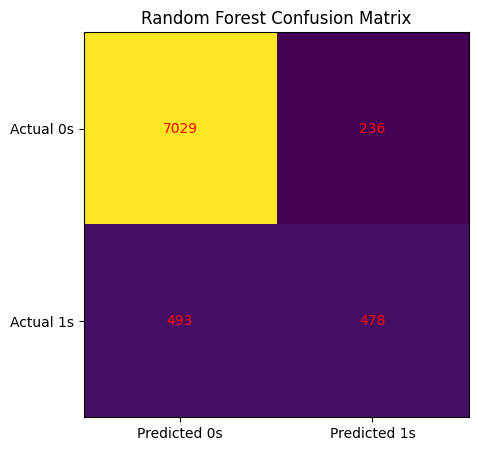

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Random Forest Confusion Matrix')
ax.imshow(rf_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, rf_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.67      0.49      0.57       971

    accuracy                           0.91      8236
   macro avg       0.80      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236



---
---

### Naive Bayes

In [56]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred_nb = nb.predict(X_test)

In [58]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Akurasi Gaussian Naive Bayes:', accuracy_nb)

Akurasi Gaussian Naive Bayes: 0.8392423506556581


#### Naive Bayes Confusion Matrix

In [59]:
nb_confusion = confusion_matrix(y_test, y_pred_nb)

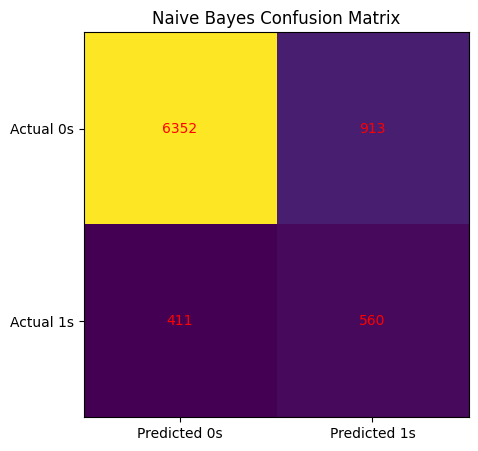

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Naive Bayes Confusion Matrix')
ax.imshow(nb_confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, nb_confusion[i, j], ha='center', va='center', color='red')

plt.show()

In [61]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7265
           1       0.38      0.58      0.46       971

    accuracy                           0.84      8236
   macro avg       0.66      0.73      0.68      8236
weighted avg       0.87      0.84      0.85      8236



---
---

## Kesimpulan

In [62]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', accuracy_logistic_regression)
print('Akurasi K-Nearest Neighbors:', accuracy_knn)
print('Akurasi Support Vector Machine:', accuracy_svm)
print('Akurasi Decision Tree:', accuracy_dt)
print('Akurasi Random Forest:', accuracy_rf)
print('Akurasi Naive Bayes:', accuracy_nb)

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.9046867411364741
Akurasi K-Nearest Neighbors: 0.894487615347256
Akurasi Support Vector Machine: 0.9022583778533269
Akurasi Decision Tree: 0.88465274405051
Akurasi Random Forest: 0.911486158329286
Akurasi Naive Bayes: 0.8392423506556581


- Dari 41.176 client hanya 11% nya saja yang memilih untuk bergabung dalam deposito jangka bank, dan paling banyak client yang bergabung memiliki pekerjaan sebagai admin.
- 4639 client atau 11% client yang memilih bergabung memliki status diantaranya 2531 client sudah married, 1620 client masih single, 476 client mengalami divorced dan 12 client tidak diketahui statusnya.
- Hasil akurasi yang paling sesuai untuk mengetahui apakah client akan bergabung deposito jangka bank adalah algoritma **Random Forest** dengan nilai akurasi sebesar 91%

---